In [202]:
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm

In [203]:
audio_PME = torch.load('data/dic_PME.pt')
audio_Q4  = torch.load('data/dic_Q4.pt')
audio_Bi  = torch.load('data/dic_Bi.pt')

In [204]:
L = []

audio_PME = torch.load('data/dic_PME.pt')
IDs = list(audio_PME.keys())

for ID in IDs:
    try:
        L.append(len(audio_PME[ID][0][0])/44100)
    except:
        pass
    
audio_Q4 = torch.load('data/dic_Q4.pt')
IDs = list(lyrics_Q4.keys())

for ID in IDs:
    try:
        L.append(len(audio_PME[ID][0][0])/44100)
    except:
        pass
    
audio_Bi = torch.load('data/dic_Q4.pt')
IDs = list(lyrics_Bi.keys())

for ID in IDs:
    try:
        L.append(len(audio_PME[ID][0][0])/44100)
    except:
        pass

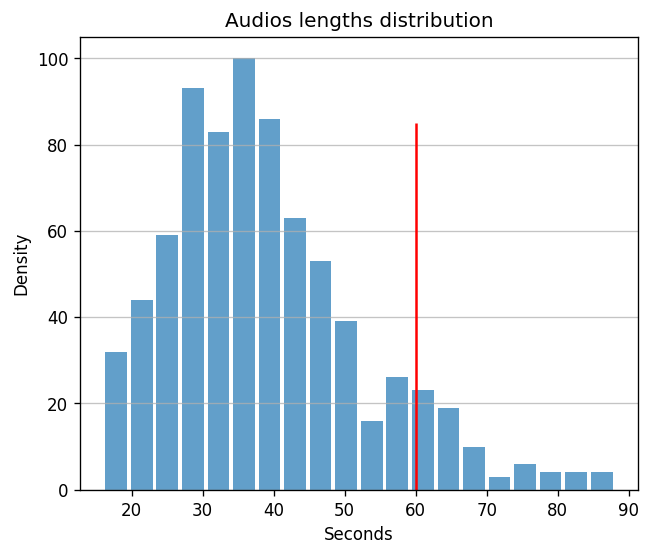

In [207]:
plt.figure(figsize=(6,5),dpi=120)
n, bins, patches = plt.hist(x=L, bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.vlines(60,0,85,'r')
plt.xlabel('Seconds')
plt.ylabel('Density')
plt.title('Audios lengths distribution')
maxfreq = n.max()
plt.savefig("Audios_lengths.png")

In [209]:
L = []

lyrics_PME = torch.load('./data/dic_PME_lyrics.pt')
L_PME = [len(l) for l in list(lyrics_PME.values())]
print('have {} lyrics'.format(len(list(lyrics_PME.keys()))))

lyrics_Q4 = torch.load('./data/dic_Q4_lyrics.pt')
L_PME = [len(l) for l in list(lyrics_Q4.values())]
print('have {} lyrics'.format(len(list(lyrics_Q4.keys()))))

L = L_PME+L_PME

lyrics_Bi = torch.load('./data/dic_Bi_lyrics.pt')
L_PME = [len(l) for l in list(lyrics_Bi.values())]
print('have {} lyrics'.format(len(list(lyrics_Bi.keys()))))

L = L_PME+L_PME

have 629 lyrics
have 479 lyrics
have 133 lyrics


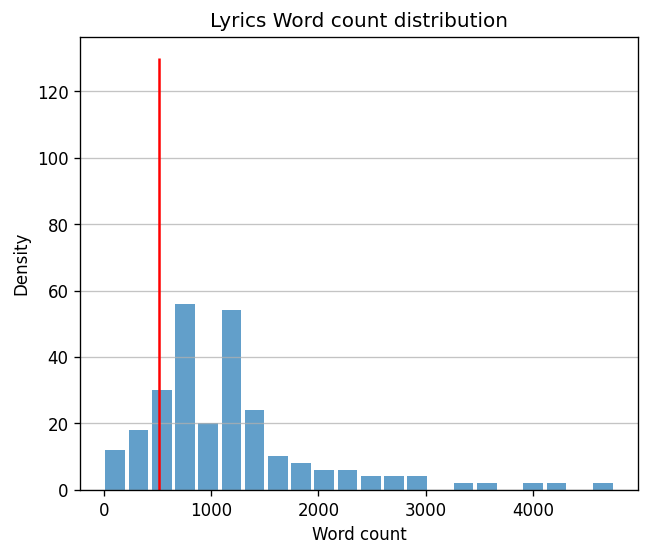

In [210]:
plt.figure(figsize=(6,5),dpi=120)
n, bins, patches = plt.hist(x=L, bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.vlines(512,0,130,'r')
plt.xlabel('Word count')
plt.ylabel('Density')
plt.title('Lyrics Word count distribution')
maxfreq = n.max()
plt.savefig("Word_lengths.png")

In [49]:
df_Q4 = pd.read_csv('./data/Q4_meta.csv')
df_B  = pd.read_csv('./data/Bi_meta.csv')
df_P  = pd.read_csv('./data/PME_meta.csv')
df_B['label'] = [int(c[1]) for c in df_B['Quadrant']]
meta = df_Q4.append(df_B).append(df_P).reset_index()

In [50]:
meta['Valence'] = meta['VA']
meta['Arousal'] = meta['AR']

In [51]:
meta['tmp'] = 1

In [52]:
data = meta.groupby("label")['tmp'].sum()
data

label
1    753
2    338
3    393
4    316
Name: tmp, dtype: int64

In [110]:
from dataloader import *

/opt/conda/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning:

"sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.



In [183]:
PME_train_set = PMEmix_dataset(range(629),'albert-base-v2')
Q4_train_set  = Q4mix_dataset(range(479),'albert-base-v2')
Bi_train_set  = Bimix_dataset(range(133),'albert-base-v2')

In [185]:
PME = DataLoader(PME_train_set, batch_size = 1,shuffle = False)
Q4 = DataLoader(Q4_train_set, batch_size = 1,shuffle = False)
Bi = DataLoader(Bi_train_set, batch_size = 1,shuffle = False)

In [186]:
Ls_PME = []
for _,_,L in tqdm(PME,total=len(PME)):
    Ls_PME.append(L)
    
Ls_Q4 = []
for _,_,L in tqdm(Q4,total=len(Q4)):
    Ls_Q4.append(L)
    
Ls_Bi = []
for _,_,L in tqdm(Bi,total=len(Bi)):
    Ls_Bi.append(L)

  0%|          | 0/606 [00:00<?, ?it/s]

/home/jovyan/Emotion/dataloader.py:185: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/jovyan/Emotion/dataloader.py:185: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/jovyan/Emotion/dataloader.py:185: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/jovyan/Emotion/dataloader.py:185: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/home/jovyan/Emotion/dataloader.py:185: UserWarn

  0%|          | 0/479 [00:00<?, ?it/s]

/home/jovyan/Emotion/dataloader.py:232: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



  0%|          | 0/131 [00:00<?, ?it/s]

/home/jovyan/Emotion/dataloader.py:278: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [187]:
def count(Ls):
    df = pd.DataFrame()
    df['Ls'] = list(map(int,Ls))
    df['tmp'] = 1
    da_ = df.groupby("Ls")['tmp'].sum()
    return da_

In [188]:
Ls_all = []
Ls_all.extend(Ls_PME)
Ls_all.extend(Ls_Q4)
Ls_all.extend(Ls_Bi)

In [189]:
len(Ls_all)

1216

In [194]:
def absolute_value(val):
    a  = numpy.round(val/100.*data_.sum(), 0)
    return '{}%\n{}'.format(round(val,2),int(a))

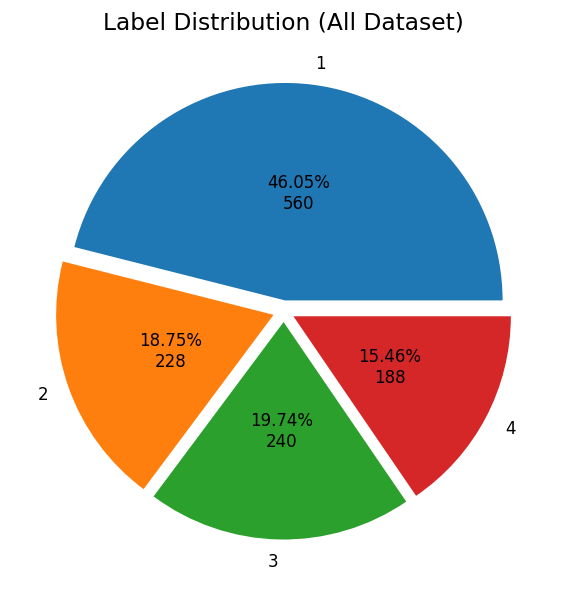

In [197]:
pie, ax = plt.subplots(figsize=[10,6],dpi=120)
labels = data.keys()
data_ = count(Ls_all)
plt.pie(x=data_, autopct=absolute_value, explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Label Distribution (All Dataset)", fontsize=14);
pie.savefig("Pie_All_Data.png")

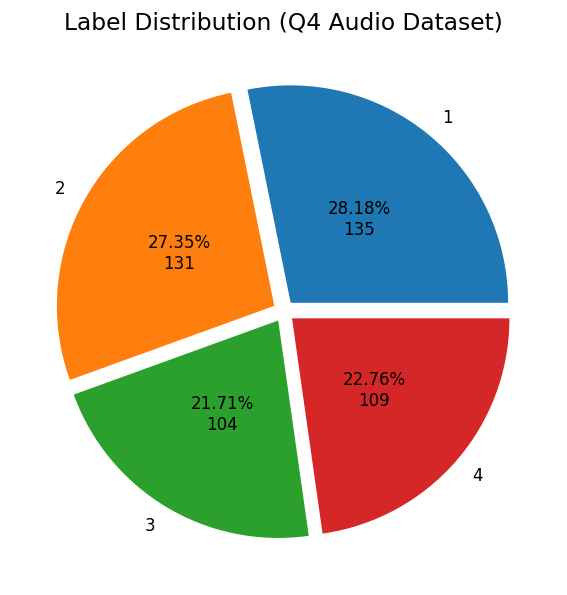

In [198]:
df_Q4['tmp'] = 1
data = df_Q4.groupby("label")['tmp'].sum()
pie, ax = plt.subplots(figsize=[10,6],dpi=120)
labels = data.keys()
data_ = count(Ls_Q4)
plt.pie(x=data_, autopct=absolute_value, explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Label Distribution (Q4 Audio Dataset)", fontsize=14);
pie.savefig("Pie_Q4_Data.png")

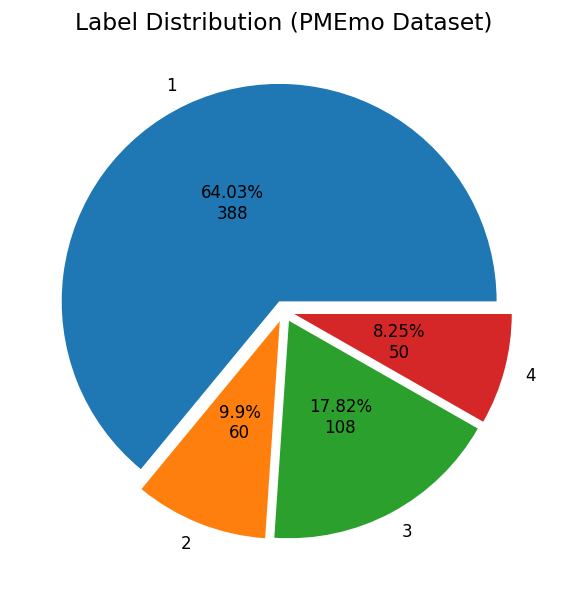

In [199]:
df_P['tmp'] = 1
data = df_P.groupby("label")['tmp'].sum()
pie, ax = plt.subplots(figsize=[10,6],dpi=120)
labels = data.keys()
data_ = count(Ls_PME)
plt.pie(x=data_, autopct=absolute_value, explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Label Distribution (PMEmo Dataset)", fontsize=14);
pie.savefig("Pie_PME_Data.png")

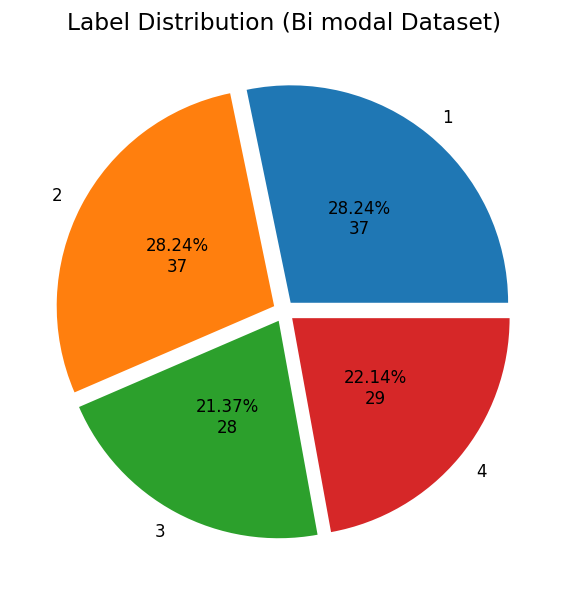

In [200]:
df_B['tmp'] = 1
data = df_B.groupby("label")['tmp'].sum()
pie, ax = plt.subplots(figsize=[10,6],dpi=120)
labels = data.keys()
data_ = count(Ls_Bi)
plt.pie(x=data_, autopct=absolute_value, explode=[0.05]*4, labels=labels, pctdistance=0.5,)
plt.title("Label Distribution (Bi modal Dataset)", fontsize=14);
pie.savefig("Pie_Bi_Data.png")